# Prolexitim NLP Analytics 
## TAS-20 & Text Data. Predictive Analysis
### Single node Machine Learning - Regression
<hr>
<b>Dataset from Prolexitim TAS-20 Spain instrument and Prolexitim NLP.</b><br>
<b>No Text Analytics included here. Using TAS and NLP APIs scores.</b>
<hr>
May 2019.<br> Prolexitim normalized dataset version 1.2 (MPGS-TFM-Submission).<br> 
Raúl Arrabales Moreno (Psicobótica / Serendeepia Research)<br>
<a target="_blank" href="http://www.conscious-robots.com/">http://www.conscious-robots.com/</a> <br>
<hr>

## This notebook contains: 

- TAS-20 + NLP Dataset loading. 
- Linear Regression for TAS-20 Score based on sentiment scores.
- Polynomial Regression for TAS-20 score.
- R2 Claculation.
- MSE, RMSE Calculation. 
- Regression Plots. 
- Polynomial Regression for TAS-20 score.

### Loading TAS Sentiment dataset

In [73]:
import pandas as pd 
from scipy import stats
import seaborn as sns

# Load nomalized dataset (no text, only TAS and NLP scores)
tasnlp_dataset_path = "D:\\Dropbox-Array2001\\Dropbox\\UNI\\MPGS\\2_TFM\\Datos\\prolexitim-sentiment-n-1.2.csv"

tasnlp_df = pd.read_csv(tasnlp_dataset_path,header=0,delimiter="\t")

In [74]:
tasnlp_df.head()

,code,TAS20,F1,F2,F3,alex-a,alex-b,card,G-score,G-magnitude,...,nlu-joy,nlu-anger,nlu-fear,nlu-disgust,nlu-sadness,es-len,G-score-n,Azure-TA-n,nlu-sentiment-n,mean-sentiment
0,b7adde8a9eec8ce92b5ee0507ce054a4,39.0,12.0,14.0,13.0,NoAlex,NoAlex,13V,-0.2,0.2,...,0.317920,0.143086,0.098997,0.422023,0.173421,115,0.388889,0.62,0.179832,0.396240
1,b7adde8a9eec8ce92b5ee0507ce054a4,39.0,12.0,14.0,13.0,NoAlex,NoAlex,18NM,-0.5,0.5,...,0.285100,0.168727,0.109176,0.057098,0.362623,110,0.222222,0.41,0.503295,0.378506
2,b7adde8a9eec8ce92b5ee0507ce054a4,39.0,12.0,14.0,13.0,NoAlex,NoAlex,12VN,0.0,1.2,...,0.039779,0.205065,0.481812,0.244164,0.164005,93,0.500000,0.63,0.637584,0.589195
3,76ef63369f7d5b6597a543017e1ef578,63.0,23.0,21.0,19.0,Alex,Alex,12VN,0.0,0.1,...,0.208997,0.007244,0.190991,0.008434,0.698307,255,0.500000,0.89,0.324648,0.571549
4,76ef63369f7d5b6597a543017e1ef578,63.0,23.0,21.0,19.0,Alex,Alex,10,0.3,0.1,...,0.367801,0.063256,0.103351,0.095947,0.469062,184,0.666667,0.24,0.224342,0.377003


## Linear Regression for TAS20 score

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from sklearn import datasets

In [ ]:
diabetes = datasets.load_diabetes()
X = diabetes.data[:, np.newaxis, 2]
y = 

In [76]:
X = tasnlp_df[["mean-sentiment", "es-len", "G-magnitude", "nlu-fear", "nlu-joy", "nlu-disgust", "nlu-anger", "nlu-sadness"]]
y = tasnlp_df["TAS20"]

In [77]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(len(X_train))
print(len(X_test))

224
96


In [78]:
poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train)

In [79]:
regr = LinearRegression()
regr.fit(X_poly_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [80]:
y_pred = regr.predict(X_poly_train)

In [81]:
print(r2_score(y_train, y_pred))
print(mean_squared_error(y_train, y_pred))

0.997673860297901
0.2186450784991764


In [82]:
train_results = pd.DataFrame({'TAS20':y_train,'P-TAS20':y_pred})

In [83]:
train_results.head()

,TAS20,P-TAS20
39,47.0,44.993561
219,46.0,45.740280
147,55.0,55.465583
181,41.0,41.537264
315,51.0,53.264799


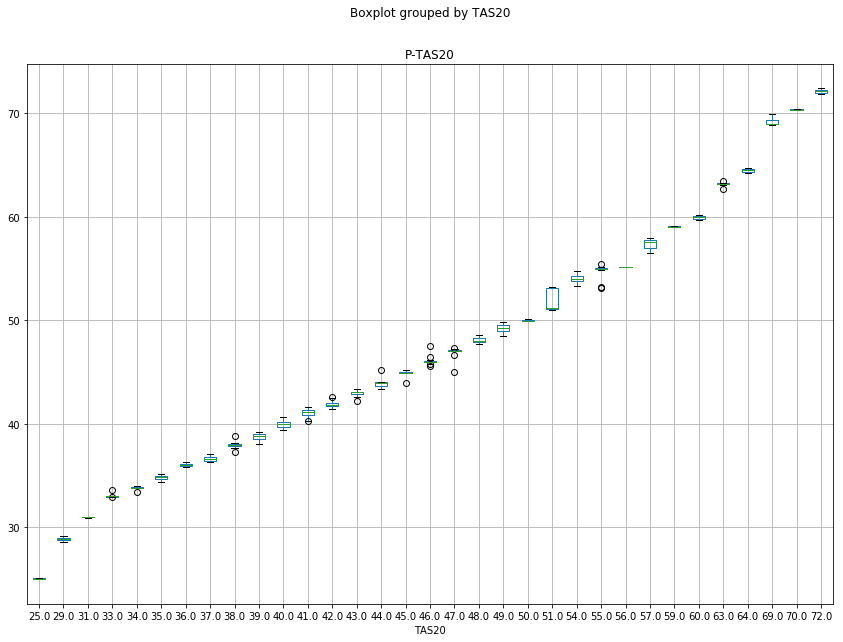

In [84]:
train_results.boxplot(by="TAS20", column="P-TAS20", figsize=[14,10], fontsize=10)

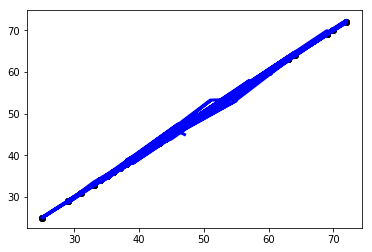

In [100]:
# train_results.plot(x='TAS20', y='P-TAS20', style='o')
plt.scatter(train_results['TAS20'], y_train,  color='black')
plt.plot(train_results['TAS20'], train_results['P-TAS20'], color='blue', linewidth=3)

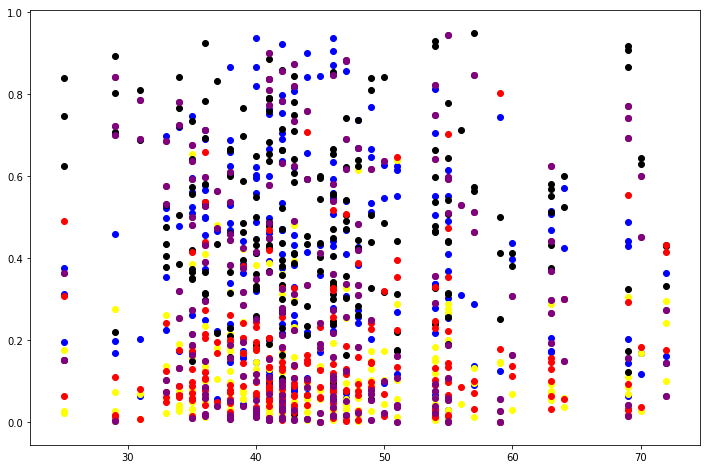

In [86]:
plt.figure(figsize=(12,8));
plt.scatter(y_train, X_train['nlu-joy'], color="brown");
plt.scatter(y_train, X_train['nlu-sadness'], color="blue");
plt.scatter(y_train, X_train['nlu-disgust'], color="yellow");
plt.scatter(y_train, X_train['mean-sentiment'], color="black");
plt.scatter(y_train, X_train['nlu-anger'], color="red");
plt.scatter(y_train, X_train['nlu-joy'], color="purple");
# plt.scatter(y_train, X_train['G-magnitude'], color="pink");
# plt.plot(train_results['TAS20'], train_results['P-TAS20'], color='r');


In [87]:
X_poly_test = poly.fit_transform(X_test)
y_pred_test = regr.predict(X_poly_test)

In [88]:
test_results = pd.DataFrame({'TAS20':y_test,'P-TAS20':y_pred_test})

In [89]:
test_results.head()

,TAS20,P-TAS20
167,54.0,60.278218
230,33.0,-33.543253
25,51.0,95.337881
63,42.0,68.067341
9,38.0,114.985946


In [90]:
print(r2_score(y_test, y_pred_test))
print(mean_squared_error(y_test, y_pred_test))

-2605.544497173084
299254.55675177946


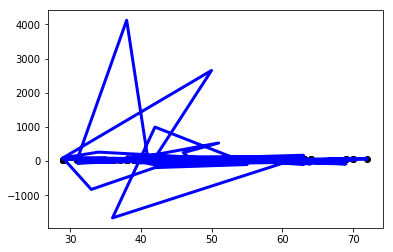

In [98]:
plt.scatter(test_results['TAS20'], y_test,  color='black')
plt.plot(test_results['TAS20'], test_results['P-TAS20'], color='blue', linewidth=3)

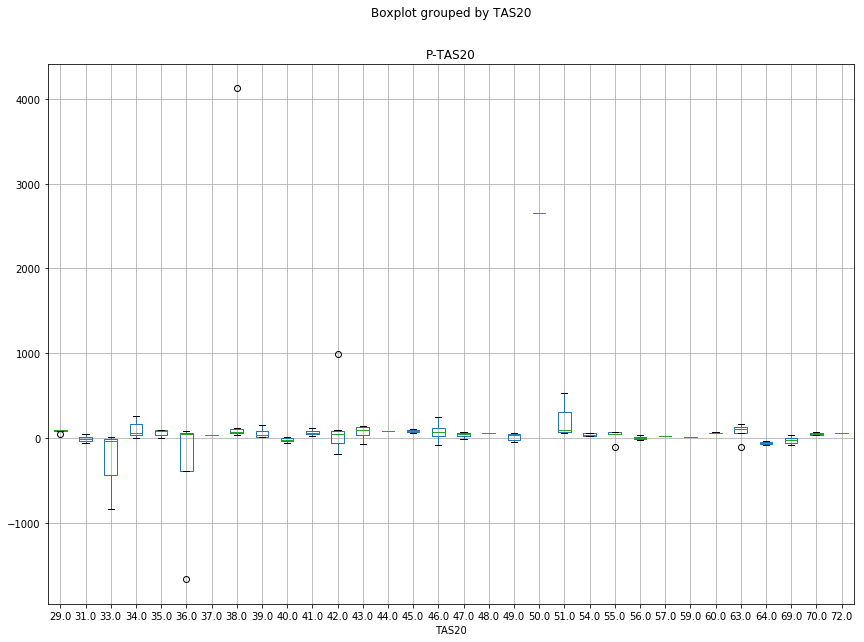

In [91]:
test_results.boxplot(by="TAS20", column="P-TAS20", figsize=[14,10], fontsize=10)

ValueError: x and y must be the same size

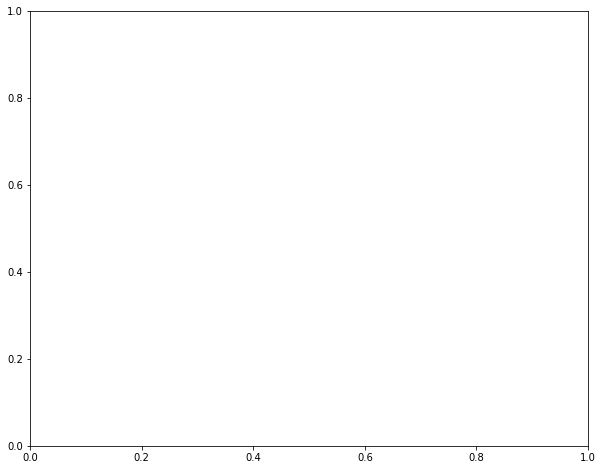

In [92]:
plt.figure(figsize=(10,8))
plt.scatter(y, X)

0.0013254127234648694
100.40415854418099


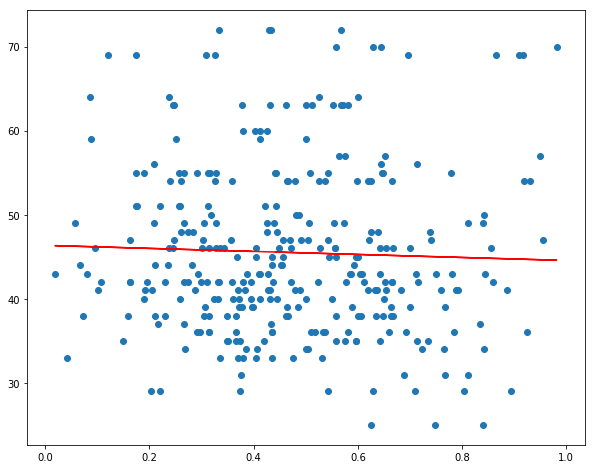

In [34]:

lin_reg = LinearRegression()
lin_reg.fit(X.values.reshape(-1, 1), y)
model_pred = lin_reg.predict(X.values.reshape(-1,1))
plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, model_pred, color='r');
print(r2_score(y, model_pred))
print(mean_squared_error(y, model_pred))

In [36]:
# Really bad results, let's go polynomial
from sklearn.preprocessing import PolynomialFeatures

# Degree 2, parabolic function
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X.values.reshape(-1, 1))

0.0037532304494486413
100.16007203293732


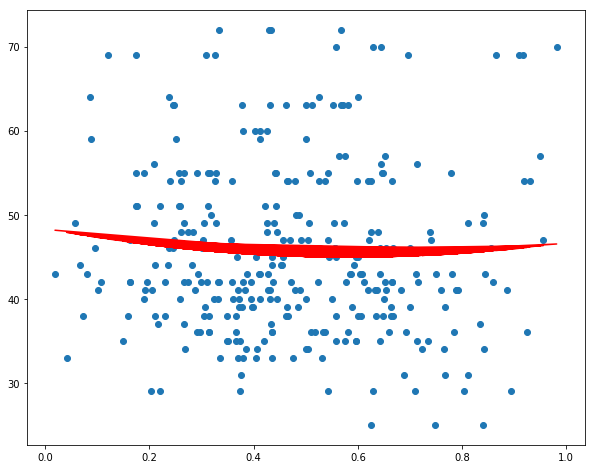

In [38]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.values.reshape(-1, 1))
y_pred = lin_reg_2.predict(X_poly)
plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, y_pred, color='r');
print(r2_score(y, y_pred))
print(mean_squared_error(y, y_pred))

In [40]:
# Degree 3, 
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X.values.reshape(-1, 1))

0.014048403473460591
99.1250219798849


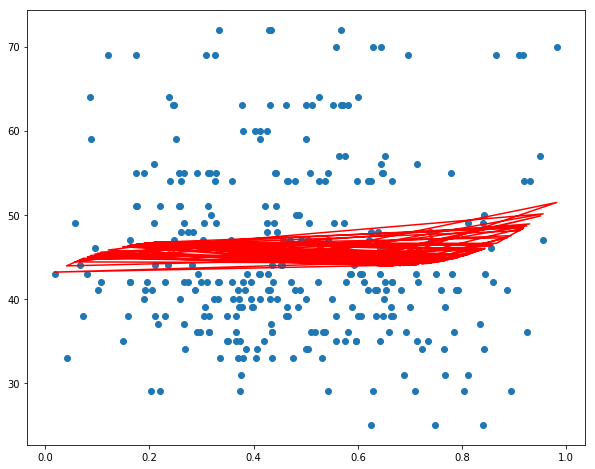

In [41]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.values.reshape(-1, 1))
y_pred = lin_reg_2.predict(X_poly)
plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, y_pred, color='r');
print(r2_score(y, y_pred))
print(mean_squared_error(y, y_pred))

In [43]:
X = tasnlp_df[["mean-sentiment", "es-len"]]
y = tasnlp_df["TAS20"]

In [47]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

model_pred = lin_reg.predict(X)

print(r2_score(y, model_pred))
print(mean_squared_error(y, model_pred))

0.0134372552299451
99.18646524270314


In [48]:
X = tasnlp_df[["mean-sentiment", "es-len", "G-magnitude"]]
y = tasnlp_df["TAS20"]

In [49]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

model_pred = lin_reg.predict(X)

print(r2_score(y, model_pred))
print(mean_squared_error(y, model_pred))

0.015879808794987738
98.94089722833522


In [50]:
X = tasnlp_df[["mean-sentiment", "es-len", "G-magnitude", "nlu-fear", "nlu-joy", "nlu-disgust", "nlu-anger", "nlu-sadness"]]
y = tasnlp_df["TAS20"]

In [51]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

model_pred = lin_reg.predict(X)

print(r2_score(y, model_pred))
print(mean_squared_error(y, model_pred))

0.023782399041220037
98.14639125601823


In [52]:
X = tasnlp_df[["mean-sentiment", "es-len", "G-magnitude", "nlu-fear", "nlu-joy", "nlu-disgust", "nlu-anger", "nlu-sadness"]]
y = tasnlp_df["TAS20"]

In [58]:
# Degree 3, 
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

In [59]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
y_pred = lin_reg_2.predict(X_poly)

print(r2_score(y, y_pred))
print(mean_squared_error(y, y_pred))

0.41119715769521625
59.19671400796737


In [82]:
X = tasnlp_df[["mean-sentiment", "es-len", "G-magnitude", "nlu-fear", "nlu-joy", "nlu-disgust", "nlu-anger", "nlu-sadness"]]
y = tasnlp_df["TAS20"]

In [101]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

In [102]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
y_pred = lin_reg_2.predict(X_poly)

print(r2_score(y, y_pred))
print(mean_squared_error(y, y_pred))

0.9942689334212975
0.5761866024492794


In [112]:
results = pd.DataFrame({'TAS20':y,'P-TAS20':y_pred})

In [114]:
results.head()

,TAS20,P-TAS20
0,39.0,39.287178
1,39.0,39.220022
2,39.0,38.785001
3,63.0,63.097653
4,63.0,62.918395


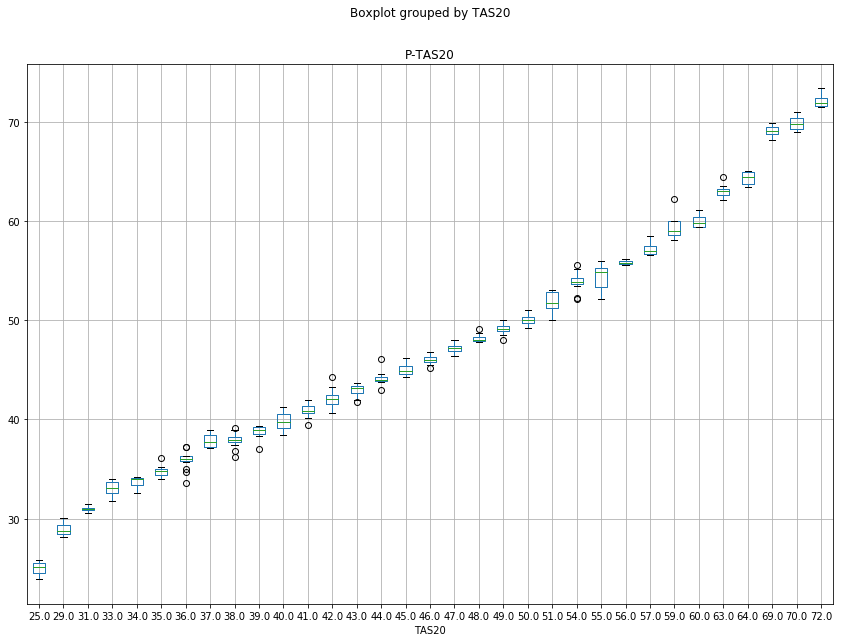

In [122]:
results.boxplot(by="TAS20", column="P-TAS20", figsize=[14,10], fontsize=10)

In [ ]:
lin